## Overview:

### Science Question: Is it possible to predict the strength of concrete based on its parameters?

Significance: Strength of concrete is one of its fundamental and critical properties to predict performance. The tests that are currently present as a standrad for the indurstry are expensive, destructive and time consuming. Predictions from current tests are a roundabout representation of the actual concrete mixes used in the field. There is an impending need for a technqiue to predict strength non-destructively which could be cheaper and faster. The modelling of the behaviour of concrete is difficult becuase of mutliple factors affecting it, which includes mix proportion, admixtures, superplastcizers added, water/cement ratio and so on. The use of AI is being done as a way to model concrete behaviour in a more effecient way.

**Dataset Source**:
The dataset is from https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

Models in use: Linear regression, Lasso method, K-nearest neighbor, Suppot-vector machine 

**Metric**: 
Spliting of the dataset would be done into train and test data. Train data would be used for training the model to predict strength of concrete. Test data would be used to evauluate and validate the performance of the models and choose the best model for strength prediction 

Importing the requiste libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import itertools as it
from sklearn.linear_model import LinearRegression  # Linear regression
from sklearn.metrics import mean_squared_error        # Compute mean square error
from sklearn.model_selection import train_test_split   # Splitting dataset into training and test data
from sklearn.linear_model import Lasso              #Lasso Regression
from sklearn.neighbors import KNeighborsRegressor   #KNN Neighbor
from sklearn.svm import SVR          # SVM
from sklearn import metrics
%matplotlib inline
import statsmodels.api as sm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cee-498-project3-forecast-strength-of-concrete/sample.csv
/kaggle/input/cee-498-project3-forecast-strength-of-concrete/train.csv
/kaggle/input/cee-498-project3-forecast-strength-of-concrete/test.csv


In [2]:

train = pd.read_csv("/kaggle/input/cee-498-project3-forecast-strength-of-concrete/train.csv")
sample= pd.read_csv("/kaggle/input/cee-498-project3-forecast-strength-of-concrete/sample.csv")
test= pd.read_csv("/kaggle/input/cee-498-project3-forecast-strength-of-concrete/test.csv")

In [3]:
del test['index']

In [4]:
test.rename(columns=dict(zip(test.columns, ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'])), inplace=True)
train.rename(columns=dict(zip(train.columns, ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age','strength'])), inplace=True)

Dividing the training dataset in order to evaluate the accuracy of various models

In [5]:
train,test = train_test_split(train,test_size =.3,random_state = 0)
train_X = train[[x for x in train.columns if x not in ["strength"] + ["age"]]]
train_Y = train["strength"]
test_X  = test[[x for x in test.columns if x not in ["strength"] + ["age"]]]
test_Y  = test["strength"]

The use of Linear regression method is used in order to train the model and make predictions

In [6]:
#Model 1= Multiple linear regression
# fit a model
lm = LinearRegression()
model = lm.fit(train_X, train_Y)
predictions = lm.predict(test_X)
m1=model.score(test_X, test_Y)
RMSE1=np.sqrt(metrics.mean_squared_error(test_Y, predictions))
print('Accuracy of model is', model.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions)))

Accuracy of model is 0.3813073939716336
Mean Absolute Error: 9.805710408418335
Mean Squared Error: 158.51427881047465
Root Mean Squared Error: 12.59024538325106


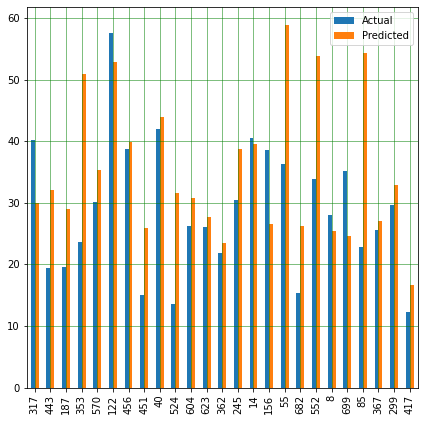

In [7]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

The use of Lasso method is used in order to train the model and make predictions

In [8]:
# Model 2: LASSO Model
las = Lasso(alpha=0.1)
model2 = las.fit(train_X, train_Y)
predictions2 = las.predict(test_X)
m12=model2.score(test_X, test_Y)
RMSE12=np.sqrt(metrics.mean_squared_error(test_Y, predictions2))
print('Accuracy of model is', model2.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions2))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions2)))

Accuracy of model is 0.3812677175541993
Mean Absolute Error: 9.804711560845934
Mean Squared Error: 158.5244442442201
Root Mean Squared Error: 12.590649079543917


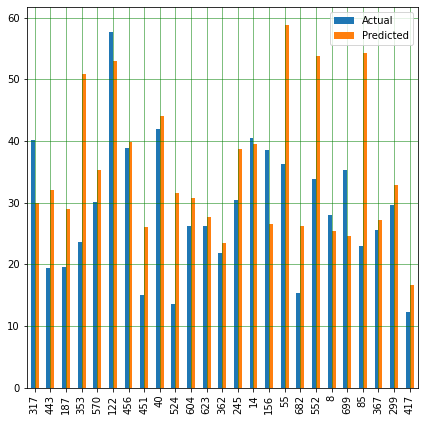

In [9]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions2})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


The use of K-nearest neighbor method in order to train the model and make predictions

In [10]:
# Model 3: KNN Neighbor
knn = KNeighborsRegressor()
model3=knn.fit(train_X,train_Y)
predictions3 = knn.predict(test_X)
m13=model3.score(test_X, test_Y)
RMSE13=np.sqrt(metrics.mean_squared_error(test_Y, predictions3))
print('Accuracy of model is', model3.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions3))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions3)))


Accuracy of model is 0.37430331648490267
Mean Absolute Error: 9.70159848386056
Mean Squared Error: 160.30878270582414
Root Mean Squared Error: 12.661310465580732


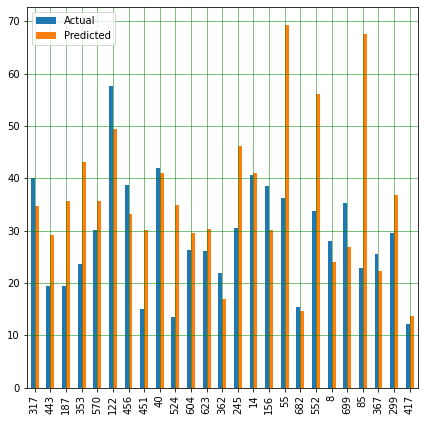

In [11]:
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions3})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

The use of Support vector machines method in order to train the model and make predictions

In [12]:
# Model 4: Support-vector machines
svm= SVR(kernel='linear')
model4=svm.fit(train_X, train_Y)
predictions4 = svm.predict(test_X)
m4=model4.score(test_X, test_Y)
RMSE4=np.sqrt(metrics.mean_squared_error(test_Y, predictions4))
print('Accuracy of model is', model4.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions4))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions4)))

Accuracy of model is 0.3323256807132362
Mean Absolute Error: 10.021878889868468
Mean Squared Error: 171.0638080539199
Root Mean Squared Error: 13.079136364986791


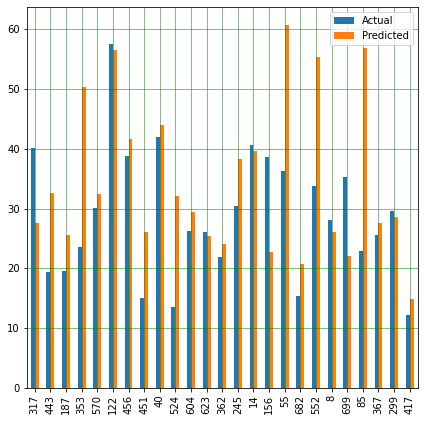

In [13]:
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions4})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

 Conclusions:
 
  1:The use of Lasso model was better than the other 3 methods
  
  2:The root mean square error is the lowest for the Lasso model
  
  3:The Lasso model would be better at predicting teh strength of concrete
